### <b>[RQ4]</b> Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

<b>8.1</b> Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

In order to provide evidence for <b>causality</b> (i.e. "more likes mean more comments"), it is <b>not enough to show the correlation between variables</b>.

* However, <b>in order to exist causation, there needs to exist correlation</b>. By looking at he data, we can observe that the correlation between `numbr_likes` and `number_comments`, is approximately equal to `37.5%`. Initially, we might have been inclined to predict some positive relationship between the two variables, however the data shows that <b>their correlation is actually quite weak.

In [6]:
# dataset containing the instagram_posts's numbr_likes and number_comments columns
df_instagram_posts_RQ8_1 = df_instagram_posts_RQ2_1 #42,710.161 rows
print(df_instagram_posts_RQ8_1.corr())

                 numbr_likes  number_comments
numbr_likes         1.000000         0.374453
number_comments     0.374453         1.000000


* Below you can find a scatterplot of the first 1,000,000 observations (we show a reduced sample for computational reasons) of the `df_instagram_posts_RQ8_1` dataframe. Unfortunately, our data is full of outliers that squash the plot to the bottom-left rendering it difficult to interpret the results and study the relationship between `numbr_likes` and `number_comments`.

Text(0.5, 1.05, 'Scatterplot of number of likes against number of comments')

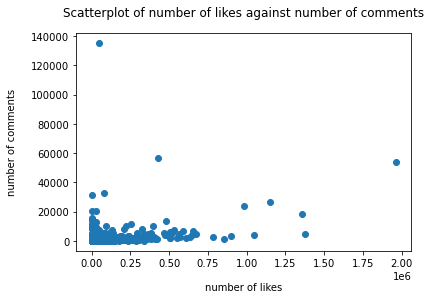

In [38]:
sample_RQ8 = df_instagram_posts_RQ8_1.head(1000000)
plt.scatter(sample_RQ8['numbr_likes'], sample_RQ8['number_comments'])
plt.xlabel("number of likes", labelpad = 14)
plt.ylabel("number of comments", labelpad = 14)
plt.title("Scatterplot of number of likes against number of comments", y = 1.05)
#The plot is squashed by the outliers

As it can be seen from the boxplots and the summary statistics previously done in the EDA of `numbr_likes` and `number_comments`, the data is **strongly** skewed and contains a lot of outliers. The summary statistics clearly show the presence of outliers as we have already discussed in RQ1. We conclude that, based on the data, <b>we can't assert that more likes means more comments.

<b>8.2</b> Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice

* We work in chunks for both dataframes `df_instagram_posts_RQ8_1` and `df_instagram_posts_RQ8_2` for computational reasons.
* Then we concatenate the columns by chunks and append the chunks to a new list called `chunk_list_RQ8_3`.
* We concatenate the chunks in `chunk_list_RQ8_3` and group by the column `hour` aggregating on the mean of `numbr_likes` and `number_comments`. We obtain a new dataframe called `df_instagram_posts_RQ8_grouped` which shows the average likes and commets for each time interval.

In [11]:
# dataset containing the instagram_posts's 
df_instagram_posts_RQ8_2 = pd.concat(chunk_list_new)[['hour']]

In [13]:
chunk_list_RQ8_1 = []
for i in range(0, len(df_instagram_posts_RQ8_1), 5000000):
    chunk = df_instagram_posts_RQ8_1[i:i+5000000]
    chunk_list_RQ8_1.append(chunk)

chunk_list_RQ8_2 = []
for i in range(0, len(df_instagram_posts_RQ8_2),b 5000000):
    chunk = df_instagram_posts_RQ8_2[i:i+5000000]
    chunk_list_RQ8_2.append(chunk)

chunk_list_RQ8_3 = []
for i in range(0, len(df_instagram_posts_RQ8_2), 5000000):
    chunk = pd.concat([df_instagram_posts_RQ8_2[i:i+5000000], df_instagram_posts_RQ8_1[i:i+5000000]], axis = 1)
    chunk_list_RQ8_3.append(chunk)

In [25]:
df_instagram_posts_RQ8_grouped = pd.concat(chunk_list_RQ8_3).groupby('hour', as_index=False).mean()
df_instagram_posts_RQ8_grouped.hour = df_instagram_posts_RQ8_grouped.hour.astype(int)
df_instagram_posts_RQ8_grouped

,hour,numbr_likes,number_comments
0,0,262.135037,7.384589
1,1,266.617649,7.683354
2,2,278.816228,7.772853
3,3,271.618603,7.325271
4,4,263.379649,6.930650
5,5,261.192717,6.683866
6,6,253.587895,6.723536
7,7,262.929015,7.026733
8,8,264.922111,7.710607
9,9,269.073676,7.393673


Susprisingly if we plot the likes and comments for each time interval, we can observe how highly correlated (80%) this variables become. Meaning that, as we previously mentioned, <b>likes and comments are not correlated on a "post" basis, but rather on a time interval basis</b>. For example the likes and comments obtained overall between 7 and 8pm, are correlated with the likes and comments obtained between 8 and 9 and so on.

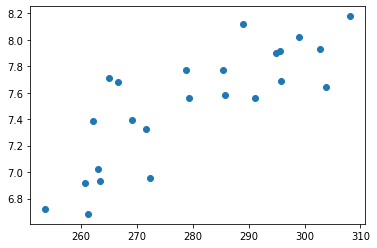

In [5]:
plt.scatter(df_instagram_posts_RQ8_grouped["numbr_likes"],df_instagram_posts_RQ8_grouped["number_comments"])

#### `1st statistics: correlation`

In [21]:
# Let's look at the correlation between the three variables

print(df_instagram_posts_RQ8_grouped.corr())

                     hour  numbr_likes  number_comments
hour             1.000000     0.514339         0.279257
numbr_likes      0.514339     1.000000         0.804829
number_comments  0.279257     0.804829         1.000000


##### `Correlation results comments`

* `hour` and `numbr_likes` have a moderate positive correlation (**51.4%**)
* `hour` and `number_comments` have a weak positive correlation (**27.9%**)

The time in which you post is more correlated to the number of likes wrt the number of comments a post gets.<br>
We can also see that the number of likes and the number of comments are strongly correlated.

#### `2nd statistics: linear regression (p-value)`

* The `p-value` for each term tests the null hypothesis H₀ that the coefficient is equal to zero. So, if the p-value is less than a specified `significance level α` (usually 0.05), we can reject the null hypothesis H₀. For small p-values we can state that the predictor variable does give a meaningul addition to the model: **the values of the predictor variable are related to the values of the response variable**.

In [22]:
# Simple linear regression
# time ~ number_likes
# time ~ number_comments

number_likes = df_instagram_posts_RQ8_grouped.numbr_likes
number_comments = df_instagram_posts_RQ8_grouped.number_comments
time = df_instagram_posts_RQ8_grouped.hour

result = scipy.stats.linregress(number_likes, time)
result2 = scipy.stats.linregress(number_comments, time)

In [23]:
print("The p-value for model 1 is:", result.pvalue)
print("the p-value for model 2 is:", result2.pvalue) # p-value == 0.0 implying that number_comments is statistically significant in predicting number_likes and viceversa 

# the number of likes is significant while the number of comments is not

The p-value for model 1 is: 0.010129899606811663
the p-value for model 2 is: 0.18633045092180706


##### Conclusion (`Linear Regression comments`)

According to the **`p-value`** for the two models, there seems to be a <b>significant relationship between the time a user posts and the number of likes the post gets</b>. In fact, the `p-value = 0.01 < 0.05`. On the contrary, <b>there is no significant relationship between the time a user posts and the number of comments</b> as the `p-value = 0.19 > 0.05`. We can also point out that the correlation between `hour` and `numbr_likes` is approximately twice as big as the correlation between `hour` and `number_comments`.

## Bonus Points

##### a) Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

* First let's divide `instagram_profiles.csv` into two subsets:
  1. The first `top10_followers` containing the top 10% regarding the number of followers.
  2. The second `rest_followers` containing the remaining 90% of profiles.

In [9]:
# top10_followers

df_instagram_profiles_bp = df_instagram_profiles.copy()
df_instagram_profiles_bp.sort_values(by = 'followers', ascending = False, inplace = True)

In [11]:
top10_followers = df_instagram_profiles_bp.head(int(0.1*len(df_instagram_profiles_bp)))

In [12]:
rest_followers = df_instagram_profiles_bp.iloc[len(top10_followers):]

Let's do some work on the `instagram_post.csv`.

* We recover the list of dataset chunks `chunk_list_new` used in question RQ3. Then, we group by `profile.id` and sum over `hour` creating a new variable called `hours_sum`. We append the new chunks to a new list called `chunk_list_new3`. Lastly, we concatenate the chunks grouping by `profile_id` and summing across the `hours_sum` column therefore obtaining the `data3` dataframe.

In [13]:
chunk_list_new3 = []
for chunk in chunk_list_new:
    chunk = chunk.groupby('profile_id', as_index=False)['hour'].agg({'hours_sum': 'sum'})
    chunk_list_new3.append(chunk)
    
data3 = pd.concat(chunk_list_new3).groupby('profile_id', as_index=False)['hours_sum'].sum()

* We group by `profile.id` and count the number of profile ids in each group creating a new column called `profile_id_count`. We append the new chunks to a new list called `chunk_list_new4`. Lastly, we concatenate the chunks grouping them by `profile_id` and summing across the `profile_id_count` column therefore obtaining the `data4` dataframe.

In [14]:
# get instagram_posts dataset and group by profile id and average across hour (time)

chunk_list_new4 = []
for chunk in chunk_list_new:
    chunk = chunk.groupby('profile_id', as_index=False)['profile_id'].agg({'profile_id_count': 'count'})
    chunk_list_new4.append(chunk)
    
data4 = pd.concat(chunk_list_new4).groupby('profile_id', as_index=False)['profile_id_count'].sum()

* We create a new dataframe `df_bp_1` by concatenating the columns in `data3` and `data4`. 

In [15]:
# Concatenate the datasets 

df_bp_1 = pd.concat([data3, data4['profile_id_count']], axis = 1)

* Finally, we create a new column `average_hour` that is calculated by dividing the `hours_sum` by the `profile_id_count`.

In [16]:
# Create a new column containing the average hour 

df_bp_1['average_hour'] = df_bp_1['hours_sum']/df_bp_1['profile_id_count']

In [17]:
df_bp_1

,profile_id,hours_sum,profile_id_count,average_hour
0,3.000000e+00,153.0,14,10.928571
1,4.000000e+00,404.0,37,10.918919
2,1.100000e+01,29.0,2,14.500000
3,1.200000e+01,5.0,1,5.000000
4,1.400000e+01,17.0,1,17.000000
...,...,...,...,...
11833760,9.001013e+13,134.0,10,13.400000
11833761,9.001013e+13,4.0,1,4.000000
11833762,9.001013e+13,42.0,2,21.000000
11833763,9.001013e+13,7.0,1,7.000000


##### **Time interval distribution regarding the top 10% users with the highest number of followers**

In [36]:
# Let's start with top10 followers

top10_followers.isna().sum()
top10_followers_1 = top10_followers.copy()
top10_followers_1.dropna(subset = ['profile_id'], inplace = True)

* We perform an inner merge `top10_followers` with `df_bp_1` on `profile_id`. So, we keep only those rows (profiles) that are present in both dataframes.

In [37]:
# keep only profile ids that are in both datasets

top10_followers_merged = pd.merge(top10_followers_1, df_bp_1, on='profile_id', how='inner')

* We use the function `time_intervals` defined in question `RQ3` to plot the distribution of the time intervals. Therefore, we count the number of `average_hour` occurrences there are for each time interval and we visualize the results.

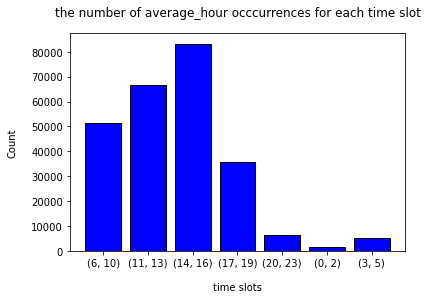

In [42]:
time_intervals(top10_followers_merged, top10_followers_merged.average_hour, slots, title = "the number of average_hour occcurrences for each time slot")

* **The mean of time intervals** is

In [43]:
np.mean(top10_followers_merged.average_hour)

13.236959396872

##### **Time interval distribution regarding the remaining 90% of users**

* We perform an inner merge `rest_followers` with `df_bp_1` on `profile_id`. So, we keep only those rows (profiles) that are present in both dataframes.

In [20]:
# Rest 90% of profile ids

rest_followers_1 = rest_followers.copy()
rest_followers_1.dropna(subset = ['profile_id'], inplace = True)

In [ ]:
rest_followers_merged = pd.merge(rest_followers_1, df_bp_1, on='profile_id', how='inner')

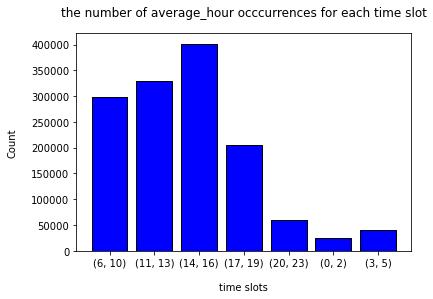

In [38]:
time_intervals(rest_followers_merged, rest_followers_merged.average_hour, slots, "the number of average_hour occcurrences for each time slot")

* **The mean of time intervals** is

In [39]:
np.mean(rest_followers_merged.average_hour)

13.102672633361614

##### `Conclusions`

It can clearly be seen that the distribution of the time intervals for the bottom 90% Instagram users (`rest_followers`) in terms of number of followers is similar to the one obtained in question `RQ3`. This could be explained by the fact that the majority (90%) of the dataset used in questin RQ3 is also present in rest_followers.

While the distribution of the time intervals for the top 10% Instagram users (`top10_followers`) is very different wrt the one obtained in question `RQ3`. The histogram is far more skewed to the left, implying that <b>the most followed users tend to post earlier in the day (6 AM - 4 PM) and especially in the 2PM-4PM slot instead of in the evening (5PM-11PM) like the majority of the sampled Instagram users.</b>
So, if you want to be more successful on Instagram, you should post in the morning and early afternoon!